In [1]:
import numpy as np
from matplotlib import pyplot as plt

# S(Q, $\omega$) generation
Costruiamo qui un modello di S(Q, $\omega$) con cui testare l'operazione monte carlo. Questo è un'estrapolazione de degli articoli e vale per il benzene deuterato.

## Costruzione della S(Q, $\omega$)

In [2]:
sigma = .2 # meV

S = lambda Q, omega: 1/np.sqrt(2*np.pi) * np.exp(-omega**2/(2*sigma**2))

(-2.0, 2.0)

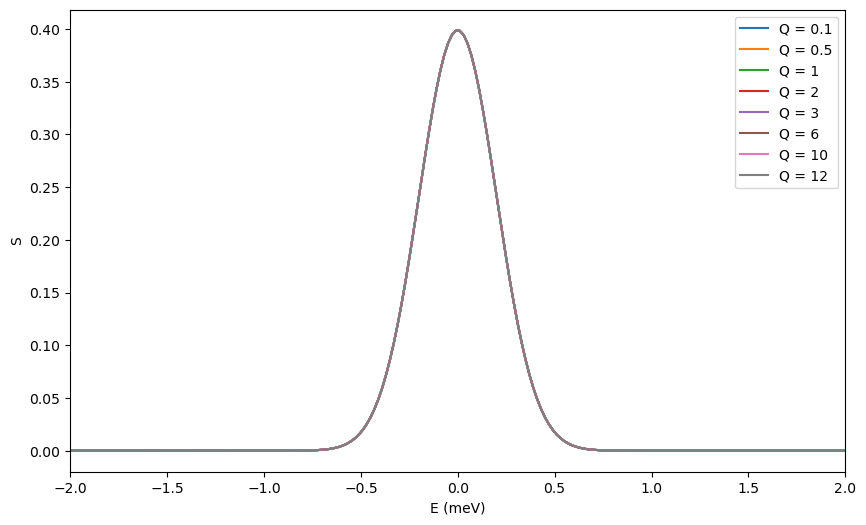

In [3]:
plt.figure(figsize=(10,6))

omega = np.linspace(-100, 100, 10000)
for q in [.1, .5, 1, 2, 3, 6, 10, 12]:
    plt.plot(omega, S(q, omega), label='Q = '+str(q))

plt.xlabel('E (meV)')
plt.ylabel('S')
plt.legend()
#plt.yscale('log')
plt.xlim(-2,2)

## Salvataggio della Mesh su S(Q, $\omega$)

In [6]:
Qmin, Qmax, dQ = .01, 15, .01
omega_min, omega_max, domega = -1, 1, .005

Q_vec = np.arange(Qmin, Qmax, dQ)
omega_vec = np.arange(omega_min, omega_max, domega)


S_mesh = np.array([S(Qmin, omega_vec)])
for q in Q_vec[1:]:
    S_mesh = np.vstack((S_mesh, S(q, omega_vec)))

S_mesh_len = S_mesh.shape[0]*S_mesh.shape[1]

################################################
print('S_mesh dimension:', S_mesh.nbytes/1e6, 'MB')
print('Q_vec:', Q_vec[:10])
print('omega_vec:', omega_vec[:10])

#################################################

# save
np.save('./data_Sq/Sqw_vanadium/S_mesh.npy', S_mesh)
np.save('./data_Sq/Sqw_vanadium/Q_vec.npy', Q_vec)
np.save('./data_Sq/Sqw_vanadium/omega_vec.npy', omega_vec)

S_mesh dimension: 4.7968 MB
Q_vec: [0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 ]
omega_vec: [-1.    -0.995 -0.99  -0.985 -0.98  -0.975 -0.97  -0.965 -0.96  -0.955]
